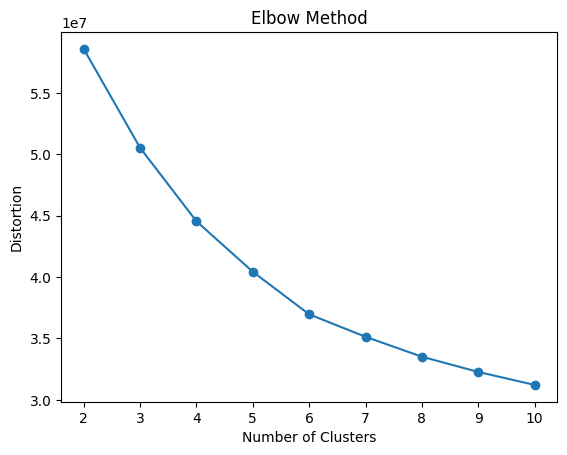

Cluster Centers:
Cluster 1: [1.46806389e+01 2.99951269e+01 2.66545483e-01 8.82255569e+00
 1.03337562e+01 4.70992420e+01 1.93169864e+01 2.11748917e+01
 4.18756962e+01 2.43702816e+01 1.01533558e+03 1.01217501e+03
 2.47934715e+00 2.96743502e+00 2.15628326e+01 2.84813660e+01]
Cluster 2: [1.28331105e+01 2.39328912e+01 8.51711791e-01 5.03227009e+00
 8.66125178e+00 3.64393292e+01 1.31095035e+01 1.85086046e+01
 6.69203844e+01 4.75250466e+01 1.01900979e+03 1.01637830e+03
 3.80967518e+00 3.75647631e+00 1.78080602e+01 2.25894223e+01]
Cluster 3: [  13.13215898   20.18137577    5.3868666     3.63230392    4.31591505
   42.18278611   15.60371258   20.0997826    82.72529126   71.30397458
 1016.2085735  1014.54448966    6.20051285    6.19008863   15.98162662
   18.45171414]


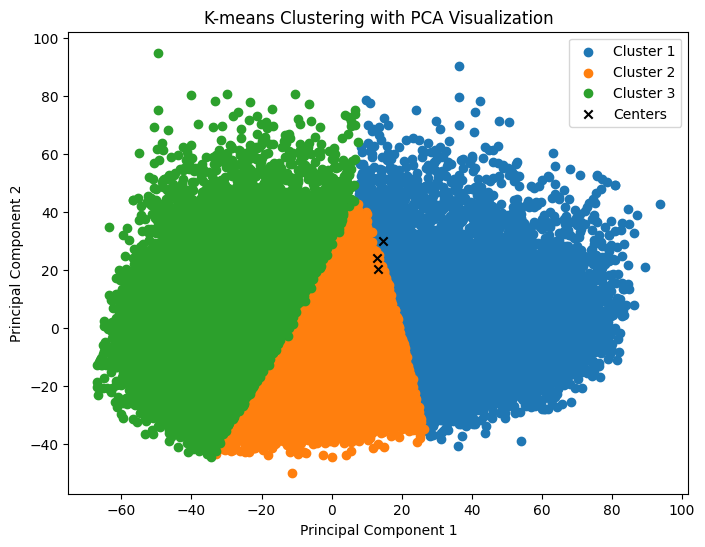

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

class KMeansClustering:
    def __init__(self, num_clusters, max_iters=300):
        self.K = num_clusters
        self.max_iters = max_iters

    def fit(self, X):
        self.centers = X[np.random.choice(range(len(X)), self.K, replace=False)]
        
        for _ in range(self.max_iters):
            labels = self.assign_labels(X)
            new_centers = self.update_centers(X, labels)
            
            if np.allclose(self.centers, new_centers):  
                break
                
            self.centers = new_centers
        
        return labels, self.centers
    
    def assign_labels(self, X):
        return np.argmin(np.linalg.norm(X[:, None] - self.centers, axis=2), axis=1)
    
    def update_centers(self, X, labels):
        return np.array([X[labels == i].mean(axis=0) for i in range(self.K)])

def find_optimal_clusters(X, max_clusters=10):
    # Use the elbow method to find the optimal number of clusters
    distortions = []
    for i in range(2, max_clusters + 1):
        kmeans = KMeansClustering(num_clusters=i)
        labels, centers = kmeans.fit(X)
        distortion = np.sum((X - centers[labels]) ** 2)
        distortions.append(distortion)

    # Plot the elbow curve
    plt.plot(range(2, max_clusters + 1), distortions, marker='o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Distortion')
    plt.title('Elbow Method')
    plt.show()

# Load data from CSV file
file_path = "/home/gllaizz/Downloads/Clustering_dataset/weatherAUS.csv"  # Update with your CSV file path
data = pd.read_csv(file_path)

# Drop non-numeric columns and rows with missing values
data_numeric = data.select_dtypes(include=np.number).dropna()
X = data_numeric.values

# Find the optimal number of clusters using the elbow method
find_optimal_clusters(X)

# Fit K-means with the optimal number of clusters
optimal_clusters = 3  # Based on the elbow method observation
kmeans = KMeansClustering(num_clusters=optimal_clusters)
labels, centers = kmeans.fit(X)

# Print cluster centers
print("Cluster Centers:")
for i, center in enumerate(centers):
    print(f"Cluster {i+1}: {center}")

# Visualize clusters using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8, 6))
for i in range(optimal_clusters):
    plt.scatter(X_pca[labels == i, 0], X_pca[labels == i, 1], label=f'Cluster {i+1}')

plt.scatter(centers[:, 0], centers[:, 1], marker='x', color='black', label='Centers')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering with PCA Visualization')
plt.legend()
plt.show()
